In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\\Users\\Giorgis\\Desktop\\Projects\\ADTA coursework\\partI\\Census.csv")
data.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,NaN,-9
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,NaN,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,NaN,4
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9


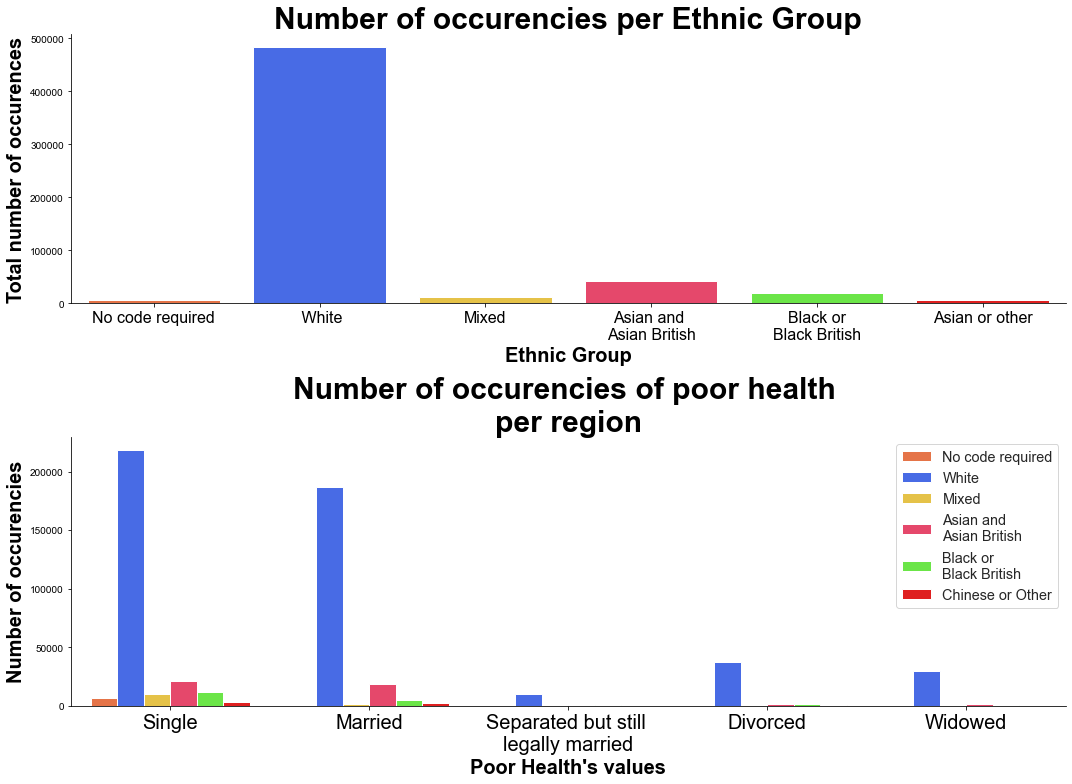

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 11))

# plt.figure(figsize=(18, 12))

sns.set_style('whitegrid')

sns.countplot(x='Ethnic Group', data=data, palette=["#ff692e", "#2e5cff",
                "#ffd12e", "#ff2e5c", "#5cff2e", "#ff0000", "black", "#8b4513",
                "#ff7f50", "#ffff80"], ax=axes[0])

axes[0].set_ylabel('Total number of occurences', size=20, fontweight='bold')
axes[0].set_xlabel('Ethnic Group', size=20, fontweight='bold')
axes[0].set_title('Number of occurencies per Ethnic Group', size=30, fontweight='bold')
# Altering the x axis labels values' names
axes[0].set_xticklabels(('No code required', ' White', 'Mixed', 'Asian and \nAsian British',
                        "Black or\nBlack British", 'Asian or other')) 

plt.setp(axes[0].get_xticklabels(), rotation=0, ha='center', size=16)


sns.countplot(x='Marital Status', data=data, hue='Ethnic Group', palette=["#ff692e", "#2e5cff",
            "#ffd12e", "#ff2e5c", "#5cff2e", "#ff0000", "black", "#8b4513",
            "#ff7f50", "#ffff80"], ax=axes[1])


axes[1].set_xlabel('Poor Health\'s values', size=20, fontweight='bold')
axes[1].set_ylabel('Number of occurencies', size=20, fontweight='bold')
axes[1].set_title('Number of occurencies of poor health \nper region', size=30, fontweight='bold')

# Altering the x axis labels values' names
axes[1].set_xticklabels(('Single', 'Married', 'Separated but still \nlegally married', 
                        'Divorced', 'Widowed')) 

plt.setp(axes[1].get_xticklabels(), size=20)

plt.tight_layout()
sns.despine()

#Editing the legeng box's name values
leg = plt.legend(fontsize='x-large')
regd = ['No code required', 'White', 'Mixed', 'Asian and \nAsian British',
       'Black or \nBlack British', 'Chinese or Other']
i=0
for reg in regd:
    leg.get_texts()[i].set_text(reg)
    i+=1

    
fig.tight_layout()
sns.despine()

In [4]:
df = data[(data['Marital Status'] >=3)]

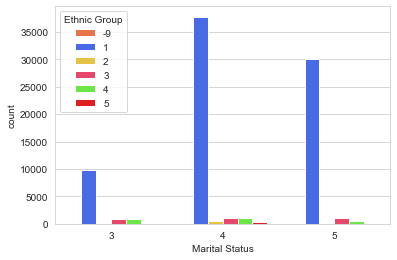

In [5]:
sns.countplot(x='Marital Status', data=df, hue='Ethnic Group', palette=["#ff692e", "#2e5cff",
            "#ffd12e", "#ff2e5c", "#5cff2e", "#ff0000", "black", "#8b4513",
            "#ff7f50", "#ffff80"])

In [6]:
# marS_in_ethnicGrp = data.pivot_table(index='Marital Status', columns='Ethinic Group', values='')

In [7]:
# marS = data[(data['Marital Status'] == 1)]
# marS.groupby(['Ethnic Group']).get_group(1).count().iloc[0]

# Creating a Data Frame
in the necessary form with the values needed in order to produce a satisfying pivot table with the number of occurences of the marital status of every ethnic group. 

In [8]:
marSvals = data['Marital Status'].unique()
ethnGrpvals = data['Ethnic Group'].unique()

In [9]:
MaritalSt_in_EthnGrp = []
c = []
for eg in ethnGrpvals:
    
    ethnGr = data[(data['Ethnic Group'] == eg)]
    for ms in marSvals:
        countVals = ethnGr.groupby(['Marital Status']).get_group(ms).count().iloc[0]
        c.append(countVals)
        MaritalSt_in_EthnGrp.append([ms, eg, countVals])
        


In [10]:
df = pd.DataFrame(MaritalSt_in_EthnGrp)

In [11]:
df = df.rename(columns={0:'Marital Status', 1: 'Ethnic Group', 2: 'No of occurrences'})
df.head()

,Marital Status,Ethnic Group,No of occurrences
0,2,1,187193
1,1,1,218654
2,4,1,37755
3,5,1,30001
4,3,1,9874


# Creating the betold pivot table
which will be visualized as a heatmap 

In [12]:
table = df.pivot_table(index='Marital Status', columns='Ethnic Group', values='No of occurrences')
table

Ethnic Group,-9,1,2,3,4,5
Marital Status,,,,,,
1,6758,218654,9736,21168,11698,2985
2,28,187193,1714,18487,4573,2184
3,8,9874,206,796,887,180
4,9,37755,423,1139,1117,270
5,1,30001,130,1121,511,134


In [13]:
table = table.rename(columns={1: 'White', 2: 'Mixed', 3: 'Asian and Asian British', 4: 'Black or Black British',
                5: 'Chinese or Other', -9: 'No code required'})
table = table.rename(index={1: 'Single', 2: 'Married', 3: 'Separated but still legally married',
                            4: 'Divorced', 5: 'Widowed'})

table

Ethnic Group,No code required,White,Mixed,Asian and Asian British,Black or Black British,Chinese or Other
Marital Status,,,,,,
Single,6758,218654,9736,21168,11698,2985
Married,28,187193,1714,18487,4573,2184
Separated but still legally married,8,9874,206,796,887,180
Divorced,9,37755,423,1139,1117,270
Widowed,1,30001,130,1121,511,134


Text(0.5, 1.0, 'Marital Status among Ethnic Groups')

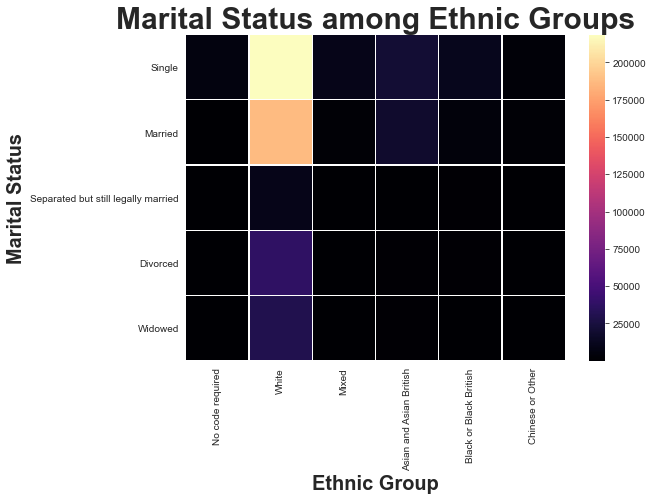

In [15]:
plt.figure(figsize=(8.5, 6))

ax = sns.heatmap(table, cmap='magma', linecolor='white', linewidth=0.2)

ax.set_xlabel('Ethnic Group', size=20, fontweight='bold')
ax.set_ylabel('Marital Status', size=20, fontweight='bold')
ax.set_title('Marital Status among Ethnic Groups', size=30, fontweight='bold')


# ax.set_xticklabels(('North East', 'North West', 'Yorkshire and the Humber',
#                    'East Midlands', 'West Midlands', 'East of England', 'London',
#                    'South East', 'South West', 'Wales'))

# ax.set_yticklabels(('Agriculture, forestry and fishing', 'Mining and quarrying',
#                    'Construction', 'Wholesale and retail trade', 'Accommodation and food service',
#                    'Transport and storage', 'Financial and insurance', 'Real estate',
#                    'Public administration and defence', 'Education', 'Human health and social work',
#                    'Other community, social and personal service'))

# plt.setp(ax.get_yticklabels(), rotation=0, size=11)
# plt.setp(ax.get_xticklabels(), rotation=30, ha='right', size=11)


# plt.savefig('HtM_Rg_Ind_hrs.jpeg')